<a href="https://colab.research.google.com/github/ClauderCarvalho/ABERTO/blob/master/TRANSFUS%C3%83O_de_Sangue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CONJUNTO DE DADOS DO CENTRODE SERVIÇOS DE TRASBFUSÃO DE SANGUE


FONTE:  

https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center


Proprietário e doador original

Prof. I-Cheng Yeh

Departamento de Gerenciamento de Informações

Universidade Chung-Hua,

Hsin Chu, Taiwan 30067, ROC

e-mail: icyeh '@' chu.edu.tw

TEL: 886-3-5186511

Data doação : outubro 3, 2008

***Informações do conjunto de dados:***



Para demonstrar o modelo de marketing do RFMTC (uma versão modificada do RFM), 

este estudo adotou o banco de dados de doadores do Centro de Serviços de 

Transfusão de Sangue na cidade de Hsin-Chu, em Taiwan. O centro passa o ônibus 

de serviço de transfusão de sangue para uma universidade na cidade de Hsin-Chu 

para coletar sangue doado a cada três meses. Para construir um modelo FRMTC, 

selecionamos 748 doadores aleatoriamente no banco de dados de doadores. Esses 

748 dados de doadores, cada um deles incluíam R (Recência - meses desde a 

última doação), F (Frequência - número total de doações), M (Monetário - sangue 

total doado em cc), T (Tempo - meses desde a primeira doação) e uma variável 

binária que representa se ele / ela doou sangue em março de 2007 


* 1 - Significa doar Sangue

* 0 - Significa não Doar Sangue









  

**INFORMAÇÕES SOBRE ATRIBUTOS**




Dado é o nome da variável, tipo de variável, a unidade de medida e uma breve 

descrição. O "Centro de Serviço de Transfusão de Sangue" é um problema de 

classificação. A ordem desta listagem corresponde à ordem dos números ao longo 

das linhas do banco de dados.

* R (Recência - meses desde a última doação),

* F (Frequência - número total de doações),

* M (Monetário - sangue total doado em cc),

* T (Tempo - meses desde a primeira doação) e uma variável binária que indica 

se ele / ela doou sangue em março de 2007 (1 significa doar sangue; 0 significa 

não doar sangue).



A tabela 1 mostra as estatísticas descritivas dos dados. Selecionamos 500 dados 

aleatoriamente como o conjunto de treinamento e o restante 248 como o conjunto 

de testes.


Tabela 1. Estatísticas descritivas dos dados


Tipo de dados variáveis ​​Medida Descrição min max média std Tempo

quantitativo de entrada Entrada 0,03 74,4 9,74 8,07

Tempo quantitativo de frequência Entrada 1 50 5,51 5,84

Sangue cc quantitativo monetário Entrada 250 12500 1378,68 1459,83

Tempo quantitativo meses Entrada 2,27 98,3 34,42 24,32

Se doou sangue em março 2007 binário 

1 = sim 

0 = não Saída 0 1 


* 1 (24%)

* 0 (76%)

###ANALISAR OS DADOS

In [0]:
import pandas as pd
import numpy as np


In [0]:
data = pd.read_csv('/content/drive/My Drive/TRANSFUSAO/transfusion.data')

In [0]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Alterando o nome da coluna de saida

In [0]:
#renomear a coluna(Criando um dicionario)

data.rename(columns={'whether he/she donated blood in March 2007':'target'}, inplace=True)

data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Visualizar a proporção de doadores e não doadores

76% dos doadores não doaram no mês de março de 2007

Classe 0 representa que não doaram sangue

Classe 1 que doaram sangue

0    0.762032
1    0.237968
Name: target, dtype: float64


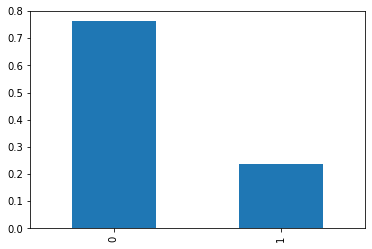

In [0]:
#Visualizando a proporção das classes

print(data.target.value_counts(normalize=True))
data.target.value_counts(normalize=True).plot(kind='bar')

Vou separar os dados entre treino e teste para uma futura modelagem

In [0]:
# importar o metodo train_tes_split

from sklearn.model_selection import train_test_split

# Agora vou dividir o dataframe em conjunto de treino e teste

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='target'), data.target, test_size=0.25,
                                                    random_state=42, stratify=data.target  )






Treinando o modelo de Regressão logística com o conjunto de Treino

In [0]:
#Treinando

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fazendo Predições com os dados de teste

In [0]:
y_pred = logreg.predict(X_test)

VISUALIZANDO A MATRIZ DE CONFUSÃO DO MODELO

In [0]:
#DANGER: primeiro argumento é o valor verdadeiro, segundo argumento é valor predito

from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)

print(confusion)


#[[140   3]  falsoposito 
 #[ 40   4]] verdadeiro positico que doaram e foramclassifica com cero


[[140   3]
 [ 40   4]]


In [0]:
!pip install  mglearn
#mglearn.plots.plot_binary_confusion_matrix()

     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=e83a39123578feec0ae0959e47f1ec749dc6093632022aa3856d2a964d42ee28
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


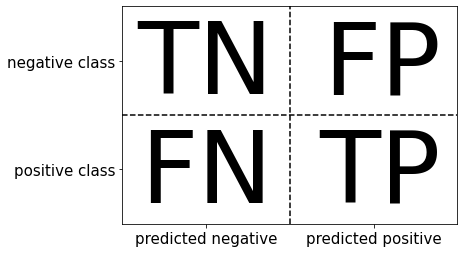

In [0]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

O que pomos tirar de estrategia para o estudo de doação de sangue. 

* Criar camapnhas segmentadas para os grupos de doadores com maior e menor qualidade de doar novamente em março de 20074



* Montar estratégia para aumentar o número de doações em períodos especificos


* facilitar o controle de estoque


* Diminuir o Desperdicio